In [4]:
from gym_2048.env.game2048_env import Game2048Env
from deep_Q_learning.DeepQ import DeepQ
import numpy as np
import matplotlib.pyplot as plt

In [6]:
game = Game2048Env()
obs = game.reset()
print("state space number:", game.observation_space.shape[0])
print("type of action:", game.action_space)
#game.render()
MEMORY_CAPACITY = 10000
brain = DeepQ(batch=500, memory_capacity=MEMORY_CAPACITY, 
              n_states=game.observation_space.shape[0], 
              n_actions=4)

state space number: 16
type of action: Discrete(4)


Ep:  0 | Ep_r:  764.0 |step: 123 |max block: 64
Ep:  1 | Ep_r:  1560.0 |step: 183 |max block: 128
Ep:  2 | Ep_r:  740.0 |step: 119 |max block: 64
Ep:  3 | Ep_r:  1344.0 |step: 179 |max block: 128
Ep:  4 | Ep_r:  604.0 |step: 95 |max block: 64
Ep:  5 | Ep_r:  1412.0 |step: 170 |max block: 128
Ep:  6 | Ep_r:  1068.0 |step: 165 |max block: 64
Ep:  7 | Ep_r:  3084.0 |step: 302 |max block: 256
Ep:  8 | Ep_r:  2344.0 |step: 241 |max block: 256
Ep:  9 | Ep_r:  1128.0 |step: 135 |max block: 128
Ep:  10 | Ep_r:  596.0 |step: 94 |max block: 64
Ep:  11 | Ep_r:  876.0 |step: 120 |max block: 64
Ep:  12 | Ep_r:  2680.0 |step: 274 |max block: 256
Ep:  13 | Ep_r:  324.0 |step: 71 |max block: 32
Ep:  14 | Ep_r:  1152.0 |step: 156 |max block: 128
Ep:  15 | Ep_r:  1272.0 |step: 152 |max block: 128
Ep:  16 | Ep_r:  1280.0 |step: 141 |max block: 128
Ep:  17 | Ep_r:  1380.0 |step: 165 |max block: 128
Ep:  18 | Ep_r:  1384.0 |step: 174 |max block: 128
Ep:  19 | Ep_r:  416.0 |step: 72 |max block: 64
Ep:  20 |

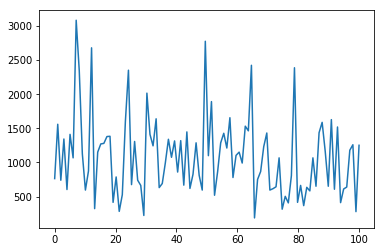

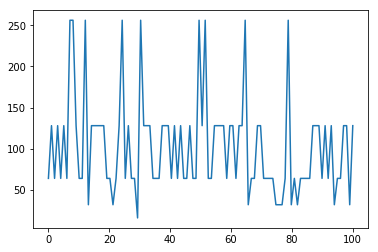

In [7]:
reward = []
max_block = []
for i_episode in range(100):
    s = game.reset()
    # print(s)    
    ep_r = 0    
    step = 0
    while True:
        a = brain.choose_action(s)
        s_, r, done, info = game.step(np.array(a))
        brain.store_transition(s, a, r, s_)
        ep_r += r
        if brain.memory_counter > MEMORY_CAPACITY:
            if brain.memory_counter == MEMORY_CAPACITY+1:
                print("-------- learning --------")
            brain.learn()
        if done:
            break
        s = s_
        step += 1
    print('Ep: ', i_episode, '| Ep_r: ', ep_r,
          '|step:', step, '|max block:', max(s))
    # print(brain.memory_counter, MEMORY_CAPACITY)
    reward.append(ep_r)
    max_block.append(max(s))
brain.save_model("2048game")
plt.plot(np.linspace(0, len(reward), len(reward)), reward)
plt.show()
plt.plot(np.linspace(0, len(max_block), len(max_block)), max_block)
plt.show()
np.savetxt("reward.txt", (reward))
np.savetxt("max_block.txt", (max_block))